In [33]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import panel as pn

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')
import hvplot.pandas

import plotly.express as px

In [2]:
Path.cwd()

PosixPath('/Users/AndrewSM/Education/George Washington University/Projects/project-1/python/source')

In [3]:
# Set file paths

file_path_united = Path('../../live_tweet_data/united_airlines.csv')
file_path_united_stock = Path('../../live_tweet_data/ual.csv')
file_path_delta = Path('../../live_tweet_data/delta_airlines.csv')
file_path_delta_stock = Path('../../live_tweet_data/dal.csv')
file_path_american = Path('../../live_tweet_data/american_airlines.csv')
file_path_american_stock = Path('../../live_tweet_data/aal.csv')
file_path_alaska = Path('../../live_tweet_data/alaska_airlines.csv')
file_path_alaska_stock = Path('../../live_tweet_data/alk.csv')
file_path_southwest = Path('../../live_tweet_data/southwest_airlines.csv')
file_path_southwest_stock = Path('../../live_tweet_data/luv.csv')
file_path_jetblue = Path('../../live_tweet_data/jetblue.csv')
file_path_jetblue_stock = Path('../../live_tweet_data/jblu.csv')

df = pd.read_csv(file_path_jetblue_stock)
df.head()

,0,2020-08-12 11:39:16,Unnamed: 2,Unnamed: 3,1293512371802177537,"RT @Samroth61562816: $GOLD “Textbook” Bounce, Daily $f $ge $aapl $msft $aal $dis $dal $tsla $ccl $plug $nclh $snap $fit $ba $mrna $ual $am…"
0,1,2020-08-12 11:38:20,NaN,NaN,1293512137864880129,"$GOLD “Textbook” Bounce, Daily\n\n$f $ge $aapl..."
1,2,2020-08-12 11:34:59,NaN,NaN,1293511295241801731,RT @Samroth61562816: $GOLD... “TEXTBOOK” BOUNC...
2,3,2020-08-12 11:34:43,NaN,NaN,1293511229290491904,"RT @Samroth61562816: GUY ADAMI, CNBC\n\n$GOLD ..."
3,4,2020-08-12 11:34:38,NaN,NaN,1293511207853404160,"RT @Samroth61562816: $GDX:\n\n""NEWMONT WORRIED..."
4,5,2020-08-12 11:34:33,NaN,NaN,1293511186399535104,RT @Samroth61562816: Mr Wonderful: $GLD CNBC\n...


In [4]:
# Create DataFrames
united_airlines = pd.read_csv(file_path_united, parse_dates=True, infer_datetime_format=True)
united_airlines_stock = pd.read_csv(file_path_united_stock, parse_dates=True, infer_datetime_format=True)
delta_airlines = pd.read_csv(file_path_delta, parse_dates=True, infer_datetime_format=True)
delta_airlines_stock = pd.read_csv(file_path_delta_stock, parse_dates=True, infer_datetime_format=True)
american_airlines = pd.read_csv(file_path_american, parse_dates=True, infer_datetime_format=True)
american_airlines_stock = pd.read_csv(file_path_american_stock, parse_dates=True, infer_datetime_format=True)
alaska_airlines = pd.read_csv(file_path_alaska, parse_dates=True, infer_datetime_format=True)
alaska_airlines_stock = pd.read_csv(file_path_alaska_stock, parse_dates=True, infer_datetime_format=True)
southwest_airlines = pd.read_csv(file_path_southwest, parse_dates=True, infer_datetime_format=True)
southwest_airlines_stock = pd.read_csv(file_path_southwest_stock, parse_dates=True, infer_datetime_format=True)
jetblue = pd.read_csv(file_path_jetblue, parse_dates=True, infer_datetime_format=True)
jetblue_stock = pd.read_csv(file_path_jetblue_stock, parse_dates=True, infer_datetime_format=True)



In [8]:
# Add headers to files
dataframes = [united_airlines, 
              united_airlines_stock,
              delta_airlines,
              delta_airlines_stock,
              american_airlines,
              american_airlines_stock,
              alaska_airlines,
              alaska_airlines_stock,
              southwest_airlines,
              southwest_airlines_stock,
              jetblue,
              jetblue_stock]

# Created fuction to add all headers (function has already been called)
def add_headers():
    for df in dataframes:
        df.columns = ["Number", 
                      "Date", 
                      "Location", 
                      "Location Coordinates", 
                      "TweetID", 
                      "Text"]
        
#add_headers()

In [11]:
# Set indexes to date column (function has already been called)
def set_index():
    for df in dataframes:
        df.set_index('Date', inplace=True)
        

#set_index()
        
american_airlines_stock.head()

,Number,Location,Location Coordinates,TweetID,Text
Date,,,,,
2020-08-12 11:42:27,1,NaN,NaN,1.293513e+18,Thanks for the alert &amp; updates\nhttps://t....
2020-08-12 11:42:23,2,NaN,NaN,1.293513e+18,RT @TicTocTick: 3333 target 🎯 met\n\n42 point ...
2020-08-12 11:42:00,3,pourrie à la maison,NaN,1.293513e+18,@summerhightime mahek SAME w idk how i already...
2020-08-12 11:41:03,4,NaN,NaN,1.293513e+18,$RGGI Huge alert - Technical Analysis for RGGI...
2020-08-12 11:40:29,5,NaN,NaN,1.293513e+18,"STOCK, OPTIONS updates, alerts Free chatroom h..."


In [23]:
# Add 'Airline' column and concatenate into 1 dataframe
united_airlines['Airline'] = 'United Airlines'
united_airlines_stock['Airline'] = 'United Airlines'
delta_airlines['Airline'] = 'Delta Airlines'
delta_airlines_stock['Airline'] = 'Delta Airlines'
american_airlines['Airline'] = 'American Airlines'
american_airlines_stock['Airline'] = 'American Airlines'
alaska_airlines['Airline'] = 'Alaska Airlines'
alaska_airlines_stock['Airline'] = 'Alaska Airlines'
southwest_airlines['Airline'] = 'Southwest Airlines'
southwest_airlines_stock['Airline'] = 'Southwest Airlines'
jetblue['Airline'] = 'JetBlue'
jetblue_stock['Airline'] = 'JetBlue'



# Concat dataframes
airline_tweets = pd.concat([united_airlines, 
                            united_airlines_stock,
                            delta_airlines,
                            delta_airlines_stock,
                            american_airlines,
                            american_airlines_stock,
                            alaska_airlines,
                            alaska_airlines_stock,
                            southwest_airlines,
                            southwest_airlines_stock,
                            jetblue,
                            jetblue_stock], 
                            axis='rows', 
                            join='inner')


airline_tweets.head()

# Final dataframe
# have all independent variables
# Don't target stock price; instead use excess returns over actual price
# Break out sentiment by day (day 1 and day 2)

,Number,Location,Location Coordinates,TweetID,Text,Airline
Date,,,,,,
2020-08-12 11:26:04,1,NaN,NaN,1.293509e+18,RT @TradeOnTheWire1: - UNITED AIRLINES HOLDING...,United Airlines
2020-08-12 11:21:53,2,NaN,NaN,1.293508e+18,Cathay Rises Most Since 2008 as Reopening Chan...,United Airlines
2020-08-12 11:11:19,3,"Current City-Sugar Land, Texas",NaN,1.293505e+18,RT @FOX26Houston: Airlines have been hit with ...,United Airlines
2020-08-12 11:00:25,4,"Grapevine, TX",NaN,1.293503e+18,"United American Airlines? The 'Lesson', should...",United Airlines
2020-08-12 10:58:04,5,NaN,NaN,1.293502e+18,-✈ Small Aircraft Collections - United Airline...,United Airlines


Airline
Alaska Airlines       3798
American Airlines     3666
Delta Airlines        3798
JetBlue               3204
Southwest Airlines    3793
United Airlines       3622
Name: Text, dtype: int64


Text(0, 0.5, 'Number of Tweets')

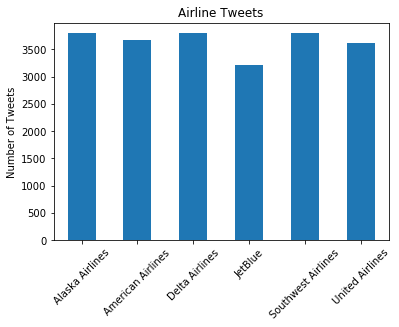

In [41]:
# Random charts
tweet_count = airline_tweets.groupby('Airline')['Text'].count()
print(tweet_count)
tweet_count.plot(kind='bar', rot=45, title='Airline Tweets')
plt.xlabel("")
plt.ylabel("Number of Tweets")

In [57]:
# HV plot

tweet_plot = tweet_count.sort_values(ascending=False).hvplot.bar(x='Airline', 
                                                                 y='Text', 
                                                                 title='Airline Tweets',
                                                                 xlabel="",
                                                                 ylabel='Number of Tweets'
                                    )

tweet_plot

:Bars   [Airline]   (Text)

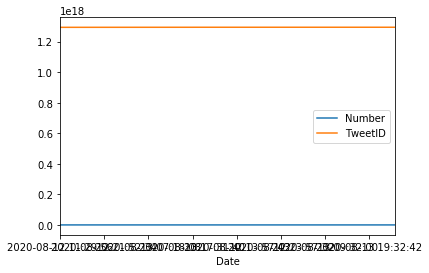

In [67]:
#airline_group = airline_tweets.groupby('Airline').count()
delta = airline_tweets[airline_tweets['Airline']=='Delta Airlines']
delta.plot()